In [1]:
import gzip
f = gzip.open('../data/mnist/train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 5

import numpy as np
f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)

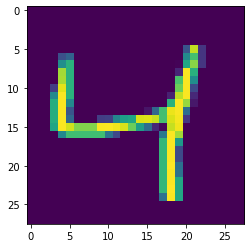

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
image = np.asarray(data[2]).squeeze()
plt.imshow(image)
plt.show()

In [81]:
image

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [3]:
import tests

In [4]:
x = tests.load_frey()

In [5]:
x.shape

(1965, 28, 20)

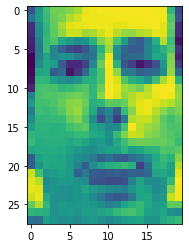

In [6]:
plt.imshow(x[0])

In [7]:
test_case_name='frey1'

In [8]:
test_case = tests.test_cases[test_case_name]

In [10]:
input_shape = test_case['input_shape']
x = test_case['dataset_loader'](input_shape, test_case.get('options'))

In [12]:
dim_z_hidden, dim_z, dim_x_hidden = test_case['model_dims']
model = test_case['model_class'](
    dim_z_hidden=dim_z_hidden,
    dim_z=dim_z,
    input_shape=x.shape[1:],
    dim_x_hidden=dim_x_hidden)

In [16]:
from tensorflow import keras
from tensorflow.keras import layers

In [67]:
model.encoder = keras.models.load_model('frey1_encoder.h5')

In [68]:
model.decoder = keras.models.load_model('frey1_decoder.h5')

In [85]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import copy
import model_normal_simple as mns
import model_vae_bayes as mvb
import elbo_calculator as ec
import train
import argparse
import os
from scipy.io import loadmat
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
loss_func = ec.elbo_calculator().get_loss_func()

In [71]:
loss = loss_func(model, x, None, test_case.get('options'))

In [72]:
loss

<tf.Tensor: id=1183992, shape=(), dtype=float32, numpy=-1196.4244>

In [73]:
z = np.random.normal(0,1,(1,dim_z))

In [74]:
z.shape

(1, 10)

In [75]:
mu_x, log_sigma_x = model.decoder(z)

In [76]:
mu_x.shape

TensorShape([1, 560])

In [77]:
log_sigma_x.shape

TensorShape([1, 560])

In [42]:
xs = np.random.normal(mu_x.numpy(), np.exp(log_sigma_x.numpy()) )

In [43]:
xs.shape

(1, 560)

In [78]:
img = np.reshape(mu_x.numpy(), (28,20))

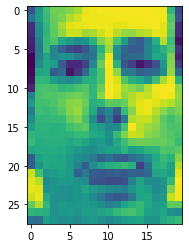

In [79]:
plt.imshow(x[0])

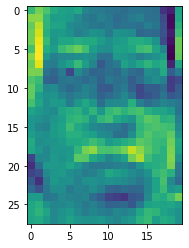

In [80]:
plt.imshow(img)

In [ ]:
%load_ext autoreload
test_case = tests.test_cases[test_case_name]
epochs = test_case['epochs']
batch_size = test_case['batch_size']
input_shape = test_case['input_shape']
x = test_case['dataset_loader'](input_shape, test_case.get('options'))
if test_case['model_class'] == mns.model_normal_simple:
    model = mns.model_normal_simple()
else:
    dim_z_hidden, dim_z, dim_x_hidden = test_case['model_dims']
    model = test_case['model_class'](
        dim_z_hidden=dim_z_hidden,
        dim_z=dim_z,
        input_shape=x.shape[1:],
        dim_x_hidden=dim_x_hidden)
optimizer = tf.keras.optimizers.Adamax()
options = test_case.get('options')
report_frequency=test_case.get('report_frequency',1)
batch_size = len(x)
for epoch in range(epochs):
    loss_func = ec.elbo_calculator().get_loss_func()
    loss = train.train_one_epoch(model, x, optimizer, loss_func, y=None, batch_size=batch_size, options=options)
    if ((epoch + 1) % report_frequency == 0):
        print('epoch %s: loss = %s' %(epoch+1, -loss.numpy()))
        model.encoder.save('%s_encoder.h5' % test_case_name)
        model.decoder.save('%s_decoder.h5' % test_case_name)
        z = np.random.normal(0,1,(1,dim_z))
        mu_x, log_sigma_x = model.decoder(z)
        img = np.reshape(mu_x.numpy(), (28,20))
        plt.imshow(img)
        plt.show()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

